In [89]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:/users/user/jupyter/python/mini_project/홈페이지 화면 구성(AB테스트)/AB테스트")

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20,5)

### Step1: 일별 현황 데이터 확인

#### 1) 기술통계 

In [47]:
data = pd.read_csv('일별현황데이터.csv', engine = 'python')
data.head()
data.columns 

Index(['구매자수', '방문자수', '일자', '총 판매 금액'], dtype='object')

In [5]:
print(data.head())
data.describe()
# 해석: 1년간의 데이터, 구매자수 범위는 상당히 큰 편. 방문자수 범위는 그렇게 크지 않은 편. 이는 박스 그림으로 확인 가능. 

   구매자수  방문자수          일자  총 판매 금액
0   328  1498  2019-01-01  6454056
1   301  1514  2019-01-02  5941439
2   219  1409  2019-01-03  3967404
3   276  1617  2019-01-04  5073708
4   311  1482  2019-01-05  6482795


,구매자수,방문자수,총 판매 금액
count,365.000000,365.000000,3.650000e+02
mean,298.347945,1502.024658,5.983674e+06
std,54.205014,52.454239,1.129601e+06
min,108.000000,1370.000000,2.002536e+06
25%,262.000000,1466.000000,5.222217e+06
50%,297.000000,1500.000000,5.990007e+06
75%,337.000000,1537.000000,6.734271e+06
max,444.000000,1638.000000,9.318244e+06


([<matplotlib.axis.XTick at 0x201242d7a60>,
 [Text(1, 0, '구매자수'), Text(2, 0, '방문자수')])

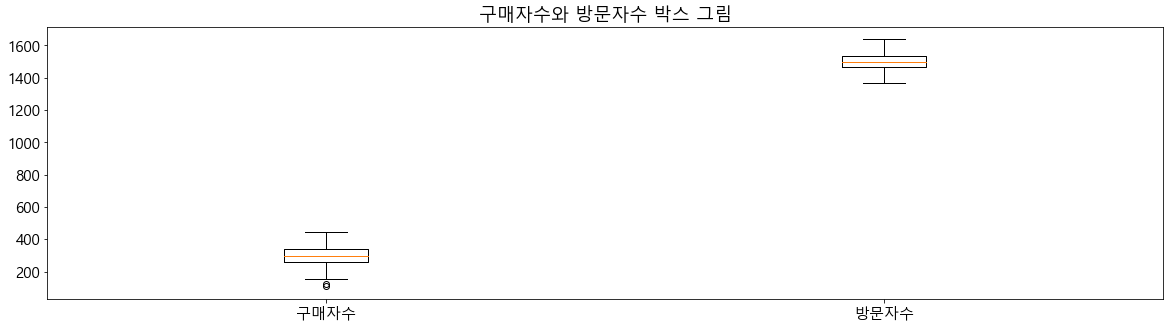

In [6]:
plt.title('구매자수와 방문자수 박스 그림')
plt.boxplot([data['구매자수'], data['방문자수']])
plt.xticks([1,2], ['구매자수', '방문자수'])
# 해석: 구매자수 평균은 훨씬 낮지만, 범위의 간격은 더 넓다. 방문자수는 평균은 훨씬 높지만, 범위의 간격은 구매자수와 비슷하다. 이는 표본변동계수에서 확인 가능. 


In [9]:
def cv(data_1, data_2):
    mean1 = np.mean(data_1)
    mean2 = np.mean(data_2)
    std1 = np.std(data_1, ddof = 1)
    std2 = np.std(data_2, ddof = 1)
    return print('구매자수 변동계수:{}, 방문자수 변동계수: {}'.format(std1/mean1, std2/mean2))

cv(data['구매자수'].values, data['방문자수'].values)
# 해석: 평균 고려한 표준편차는 구매자수가 더 높다. 이것이 의미하는 바는 무엇일까? 
np.mean(data['구매자수'].values)/np.mean(data['방문자수'])
# 의문점:평균 전환율이 20%라고 말할 수 있는가? 아니면 매일 전환율을 가지고 평균을 내야 하는 건가? 평균 전환율은 매일 전환율을 가지고 계산해야 한다. 

구매자수 변동계수:0.1816838859010169, 방문자수 변동계수: 0.034922355481921796


0.1986305242786449

In [14]:
# 매일 전환율 구하기 
data['전환율'] = data['구매자수']/data['방문자수']
data.head()
np.mean(data['전환율'])
# 해석: 앞에서 구매자수 평균을 방문자수 평균으로 나눈 경우와 크게 차이는 없다. '대략적으로 매일 전환율이 비스무리 한 것이다.' 라고 말하고 내가 통계적으로 검증할 수 있는가?  

0.19890534316121808

#### 2) 일자별 방문자수/구매자수/총 판매금액 추이

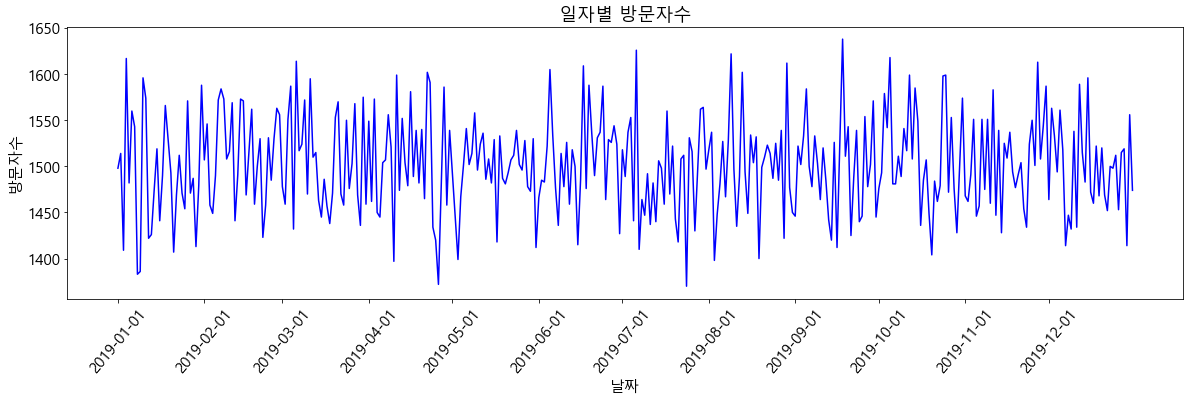

In [19]:
plt.title('일자별 방문자수')
plt.xlabel('날짜')
plt.ylabel('방문자수')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
plt.xticks(xtick_range, data['일자'].loc[xtick_range], rotation = 50)

plt.plot(data['일자'], data['방문자수'], color = 'b')

# 해석: 패턴? 찾지는 못하겠다. 나중에 빈발 패턴 경우 강의 들어보면서 정리해보자. 이 데이터에서 뽑을 수 있는 것은, pitch를 찍은 이유는 무엇일까 고민해 보는 것. 왜 최저점을 찍었을까 고민해보는 것. 

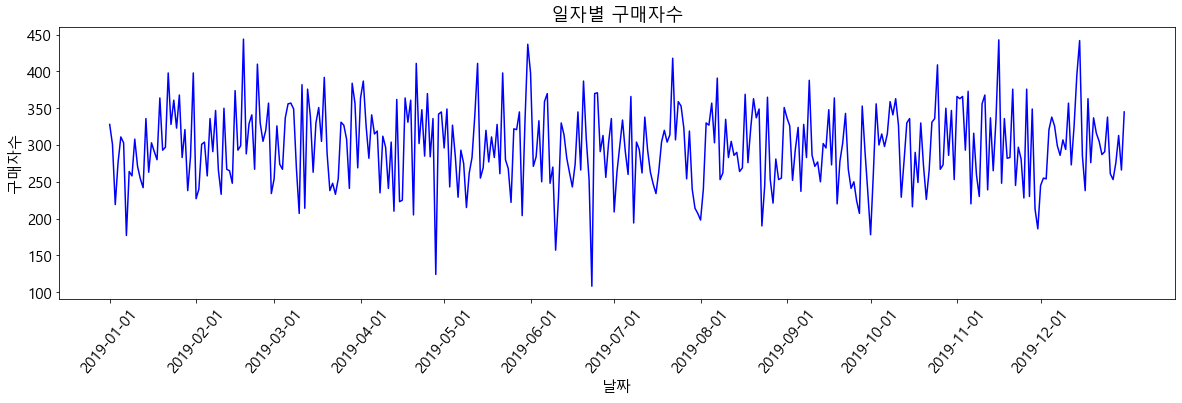

In [20]:
plt.title('일자별 구매자수')
plt.xlabel('날짜')
plt.ylabel('구매자수')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
plt.xticks(xtick_range, data['일자'].loc[xtick_range], rotation = 50)

plt.plot(data['일자'], data['구매자수'], color = 'b')
# 해석: 이것도 마찬가지. 반복되는 패턴을 육안으로 바로 확인하기는 힘들 듯 하다.  여기서도 마찬가지. 왜 pitch를 찍었을까 고민해봅시다.왜 최저점을 찍었을까 고민해 보는 것. 
# 해석: 이와 관련된 내용은 무엇이 있을까? 이벤트/쿠폰/광고 노출이 잦았나? 그리고 온라인 쇼핑몰이라서 계절을 잘 안 타나보다. 

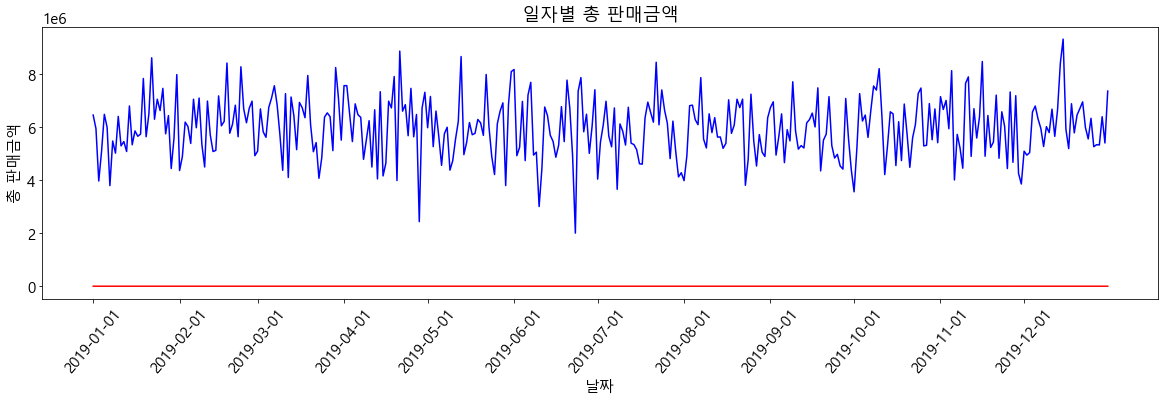

In [22]:
plt.title('일자별 총 판매금액')
plt.xlabel('날짜')
plt.ylabel('총 판매금액')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
plt.xticks(xtick_range, data['일자'].loc[xtick_range], rotation = 50)

plt.plot(data['일자'], data['총 판매 금액'], color = 'b')
# 해석: 이것도 마찬가지 해석 가능. 구매자수의 영향을 많이 받을 것으로 예상되니 비슷한 결과인 것 같다. 한가지 궁금증은 진짜 영향을 많이 받나? 그래프에서 확인 방법은? 로그 변환 해보자.
# 해석: 아니네. 로그 변환은 보통 데이터 분포를 변환할 때 사용하고 내가 해야 할 것은 데이터 단위를 변환해야 하네. 지금 측정 단위가 다르기 때문에 스케잉링 해야 한다. 
plt.plot(data['일자'], data['구매자수'], color = 'r')


In [24]:
# 일자별 총 판매 금액과 구매자수 추이를 비교해보고 싶다. 서로 어느정도 닮았을까? 이를 비교하기 위해서 데이터 단위를 변환해주어야 한다. 
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 조건: 변수별 단위 변환을 해주자. 굳이 뭐 전체를 할 필요는 없으니까 말이다. 무엇을 고르지? 
data['purchase_minmax'] = preprocessing.MinMaxScaler(data['구매자수'])
data['sales_minmax'] = preprocessing.MinMaxScaler(data['총 판매 금액'])

# 오류: 음 float 값이 주어지는 것이 아니라 MinMaxScaler 값이 주어진다. 
# 해결책: 특정 변수만을 단위 변환하고 싶으니 함수 지정해서 특정 변수만 변환하자. 

In [29]:
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom

data['purchase_minmax'] = norm(data['구매자수'])
data['sales_minmax'] = norm(data['총 판매 금액'])
data.head()

,구매자수,방문자수,일자,총 판매 금액,purchase_minmax,sales_minmax
0,328,1498,2019-01-01,6454056,0.654762,0.608488
1,301,1514,2019-01-02,5941439,0.574405,0.538417
2,219,1409,2019-01-03,3967404,0.330357,0.268582
3,276,1617,2019-01-04,5073708,0.500000,0.419805
4,311,1482,2019-01-05,6482795,0.604167,0.612416


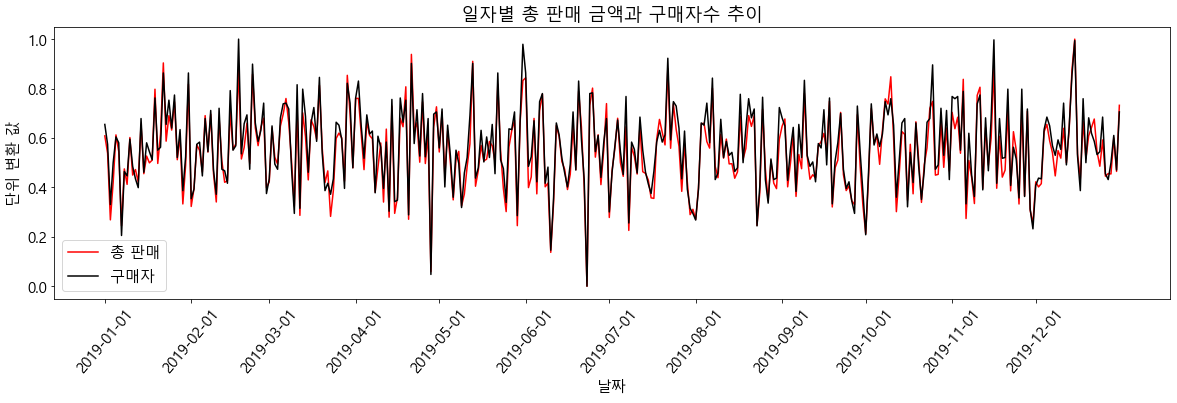

In [34]:
plt.title('일자별 총 판매 금액과 구매자수 추이')
plt.xlabel('날짜')
plt.ylabel('단위 변환 값')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
plt.xticks(xtick_range, data['일자'].loc[xtick_range], rotation = 50)

plt.plot(data['일자'], data['sales_minmax'], label = '총 판매', color = 'r')
plt.plot(data['일자'], data['purchase_minmax'],label = '구매자', color = 'k')

plt.legend()
# 해석: 한가지 가정할 수 있는 것은, 가격대이다. 특별나게 가격이 높은 것은 구매자가 많다고 구매가 많이 이루어지지 않는 것 같다. 그래서 추이가 비슷하지 않을까? 
# 의문점: 정말 이럴까? 실제 데이터 분석 환경에서 맞닥뜨리면 좋겠다. 궁금하다. 

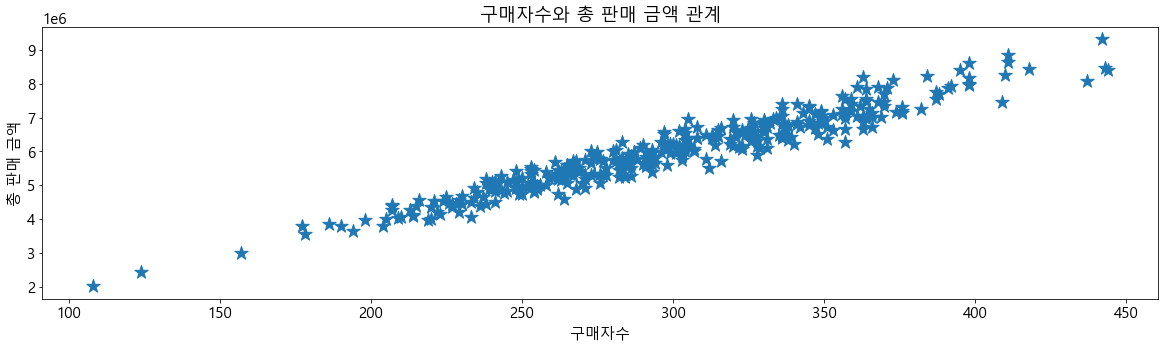

In [35]:
# 실제 상관관계가 있는지 확인해보자. 우선적으로 scatter plot을 찍어 본 후, 피어슨 상관계수를 구하고 regression 실행해보자. 
plt.title('구매자수와 총 판매 금액 관계')
plt.xlabel("구매자수")
plt.ylabel("총 판매 금액")

plt.scatter(data['구매자수'], data['총 판매 금액'], s = 200, marker = '*')
# 해석: 거의 완전한 선형 관계이다. 

array([[<AxesSubplot:xlabel='구매자수', ylabel='구매자수'>,
        <AxesSubplot:xlabel='총 판매 금액', ylabel='구매자수'>],
       [<AxesSubplot:xlabel='구매자수', ylabel='총 판매 금액'>,
        <AxesSubplot:xlabel='총 판매 금액', ylabel='총 판매 금액'>]], dtype=object)

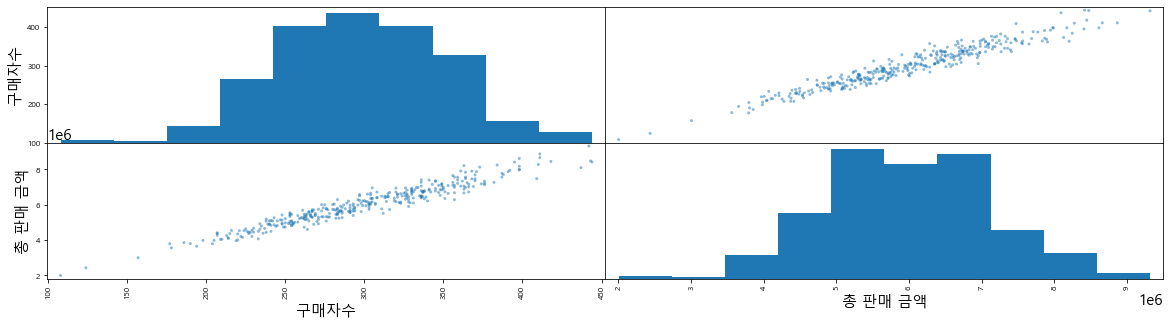

In [36]:
pd.plotting.scatter_matrix(data[['구매자수', '총 판매 금액']])

In [40]:
# 피어슨 상관계수, 스피어만 계수
from scipy.stats import *
print('피어슨 상관계수: {}'.format(pearsonr(data['구매자수'], data['총 판매 금액'])))
print('스피어만 계수: {}'.format(spearmanr(data['구매자수'], data['총 판매 금액'])))
# 해석: 매우 명확한 관계를 보여주고 있다. 사실 scatterplot에서 이미 보여주고 있다. 그냥 해보고 싶었다. 

피어슨 상관계수: (0.9646155233486569, 2.9966960732778286e-212)
스피어만 계수: SpearmanrResult(correlation=0.9625460931327066, pvalue=7.493863438660442e-208)


In [56]:
data_copy = data.copy()
col_list = list(data_copy.columns)
col_list = [c.replace(' ', '_') for c in col_list]
data_copy.columns = col_list
data_copy.columns

Index(['구매자수', '방문자수', '일자', '총_판매_금액'], dtype='object')

In [57]:
# 회귀 분석
from statsmodels.formula.api import ols
res = ols('총_판매_금액 ~ 구매자수 ', data = data_copy).fit()
res.summary()
# 오류: 변수명에 띄어쓰기가 포함되어서 자꾸 에러가 난다. 띄어쓰기 미리 없애보자. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                총_판매_금액   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     4859.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):          3.00e-212
Time:                        12:52:14   Log-Likelihood:                -5118.0
No. Observations:                 365   AIC:                         1.024e+04
Df Residuals:                     363   BIC:                         1.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.373e+04   8.74e+04     -0.157      0.875   -1.86e+05    1.58e+05
구매자수         2.01e+04    288.388     69.705      0.000    1.95e+04    2.07e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.016
Skew:                           0.013   Prob(JB):                        0.992
Kurtosis:                       3.018   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current

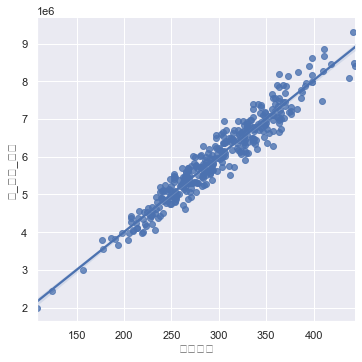

In [60]:
import seaborn as sns; sns.set()
ax = sns.lmplot(x= '구매자수', y = '총_판매_금액', data = data_copy)

### step2:상품 배치와 상품 구매 금액에 따른 관계 분석

#### 1) 상품 배치에 따른 상품 구매 금액 평균 차이 분석(구매 금액 0원 미포함)
- 순차 테스트로 진행된다. 때문에 고객 아이디가 모두 다르다. 근데 한가지 궁금한게, 순차로 하더라도 실제 문제 상황에서는 겹치는 ID도 있지 않을까? 실험할 때 상관 없으려나? 
- 구매 금액 0원은 미포함한다. 평균에 영향을 주기 때문이다. 보다 정확한 산정을 위해서 일단은 구매 금액이 0원이 사람은 제외한다. 
- 3개 이상의 집단 비교. 일원 분산 분석 실시. 영가설 = 세 집단의 평균에는 차이가 없다. 대립가설 = 세 집단의 평균에는 차이가 있다. 최소 한 개 그룹에는 차이를 보인다. 
- 어떤 것들이 차이가 있는지는 사후 검정이 필요하다. 
- 독립성/정규성/등분산성
- 정규성과 등분산성을 따르지 않으면 kruskal-Wallis H Test를 실시해야 한다. 

In [66]:
arr_a = pd.read_csv('상품배치_A.csv', engine = 'python', index_col= '고객ID')
arr_b = pd.read_csv('상품배치_B.csv', engine = 'python', index_col= '고객ID')
arr_c = pd.read_csv('상품배치_C.csv', engine = 'python', index_col= '고객ID')

In [73]:
# 각자 다른 고객군을 가짐. 다른 조건들을 가지고 진행된 실험임. 독립성 가짐. 
arr_a_x = arr_a.loc[arr_a['구매금액'] !=0] 
arr_b_x = arr_b.loc[arr_b['구매금액'] !=0] 
arr_c_x = arr_c.loc[arr_c['구매금액'] !=0] 

In [75]:
print(np.mean(arr_a), np.mean(arr_b), np.mean(arr_c))
print(np.mean(arr_a_x), np.mean(arr_b_x), np.mean(arr_c_x))
# 해석: 0을 포함하는 것과 포함하지 않는 것의 격차가 상당히 큰 편이다. 

구매금액    10296.727273
dtype: float64 구매금액    7694.45
dtype: float64 구매금액    7994.722973
dtype: float64
구매금액    19987.764706
dtype: float64 구매금액    18104.588235
dtype: float64 구매금액    20054.559322
dtype: float64


In [95]:
# 정규성 검증. 
from scipy.stats import*

# 정규성 검증 전에 데이터 ndarray화
a = arr_a_x['구매금액'].values   # tolist()랑은 무슨 차이일까? 하나는 ndarray화 하나는 list화
b = arr_b_x['구매금액'].values
c = arr_c_x['구매금액'].values


# 정규성 검증
print(kstest(a, 'norm'))
print(kstest(b, 'norm'))
print(kstest(c, 'norm'))
# 해석: 셋다 정규성을 띈다.

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


([<matplotlib.axis.XTick at 0x2012b28feb0>,
 [Text(1, 0, '상품배치 A'), Text(2, 0, '상품배치 B'), Text(3, 0, '상품배치 C')])

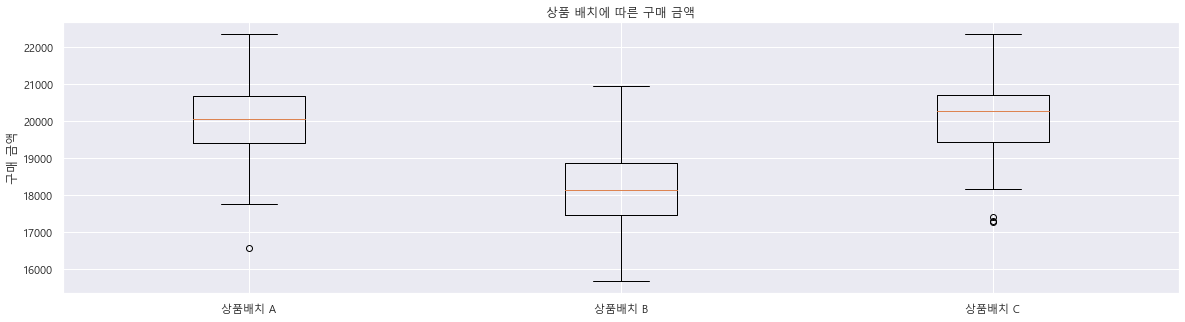

In [94]:
# 일원분산분석 전에 대략적인 데이터 분포 확인(박스플롯)
plt.title('상품 배치에 따른 구매 금액')
plt.ylabel('구매 금액')

plt.boxplot([a,b,c])
plt.xticks([1,2,3], ['상품배치 A', '상품배치 B', '상품배치 C'])  # 음 왜 그림을 그리고 나서 xticks를 설정해야 하는 거지? 

# 해석: 육안으로 보기에는 상품 배치 B 제외하고는 A,C가 비슷한 것 같다. 

In [96]:
# 일원분산분석. 
f_oneway(a,b,c)
# 해석: 영가설 기각한다. 즉, 적어도 한개의 집단의 평균이 다르다. 사후 분석 필요

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)

In [104]:
# 사후 분석: Tukey HSD test(honestly significant difference). HSD(a,b) = (max(ma, mb) - min(ma, mb))/SE. SE = 그룹 a와 b의 표준오차, 이 값이 유의 수준보다 크면 두 차이가 유의하다고 간주. 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 사후 분석 전에 data, group 만들어 주기. 
Data = a.tolist() + b.tolist() + c.tolist()
Group = ['a']*len(a) + ['b']*len(b) + ['c']*len(c)


print(pairwise_tukeyhsd(Data, Group))

# 해석: a ~ b 유의미한 차이가 있음, a ~ c 유의미한 차이가 없음, b ~ c 유의미한 치이가 있음. reject 결과가 true면 유의한 차이가 있음. 
# 이후 a,c는 같은 집단으로 볼 수 있다. 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     a      b -1883.1765 0.001 -2276.2766 -1490.0763   True
     a      c    66.7946   0.9  -343.9011   477.4903  False
     b      c  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


#### 2) 상품 배치에 따른 상품 구매 금액 평균 차이 분석(구매 금액 0원 포함)


KstestResult(statistic=0.5151515151515151, pvalue=2.490817585851874e-49)
KstestResult(statistic=0.5, pvalue=1.6346312024307732e-37)
KstestResult(statistic=0.5, pvalue=9.71661593795993e-35)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     a      b -2602.2773 0.0314 -5020.3977 -184.1568   True
     a      c -2302.0043 0.0741 -4773.7489  169.7403  False
     b      c    300.273    0.9 -2293.9871  2894.533  False
-----------------------------------------------------------


(구매금액    10296.727273
 dtype: float64,
 구매금액    7694.45
 dtype: float64,
 구매금액    7994.722973
 dtype: float64)

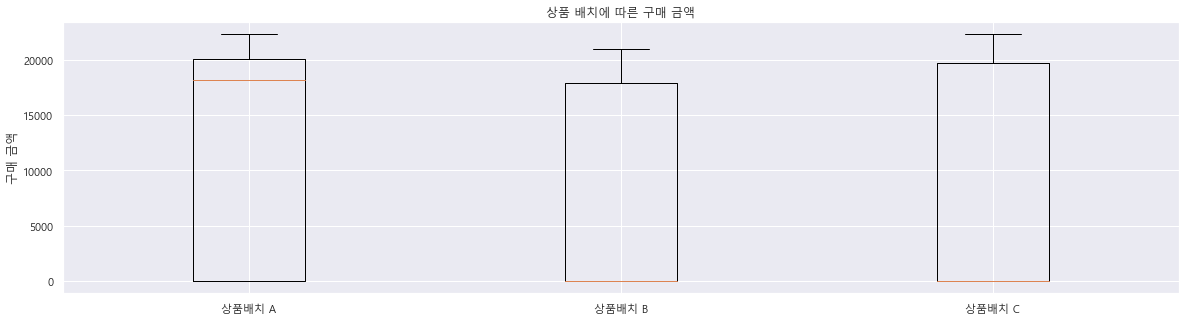

In [115]:
# 정규성 검증. 
from scipy.stats import*

# 정규성 검증 전에 데이터 ndarray화
a = arr_a['구매금액'].values   # tolist()랑은 무슨 차이일까? 하나는 ndarray화 하나는 list화
b = arr_b['구매금액'].values
c = arr_c['구매금액'].values


# 정규성 검증
print(kstest(a, 'norm'))
print(kstest(b, 'norm'))
print(kstest(c, 'norm'))
# 해석: 셋다 정규성을 띈다.

# 일원분산분석 전에 대략적인 데이터 분포 확인(박스플롯)
plt.title('상품 배치에 따른 구매 금액')
plt.ylabel('구매 금액')

plt.boxplot([a,b,c])
plt.xticks([1,2,3], ['상품배치 A', '상품배치 B', '상품배치 C'])  # 음 왜 그림을 그리고 나서 xticks를 설정해야 하는 거지? 

# 해석: 육안으로 보기에 범위에는 큰 차이가 있지 않다. 하지만, 중간값을 보면, a의 경우 중간값이 0보다 훨씬 큰 수이지만 b,c의 경우는 0혹은 0에 근접한 수이다. 
# 앞서 평균 살펴본 것 처럼, b,c는 0을 포함했을 때 확실히 평균이 급격히 낮아졌다. 때문에 중간값이 0이 나온 것은 당연한 결과인 듯 하다. 

# 일원분산분석. 
f_oneway(a,b,c)
# 해석: 영가설 기각한다. 즉, 적어도 한개의 집단의 평균이 다르다. 사후 분석 필요

# 사후 분석: Tukey HSD test(honestly significant difference). HSD(a,b) = (max(ma, mb) - min(ma, mb))/SE. SE = 그룹 a와 b의 표준오차, 이 값이 유의 수준보다 크면 두 차이가 유의하다고 간주. 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 사후 분석 전에 data, group 만들어 주기. 
Data = a.tolist() + b.tolist() + c.tolist()
Group = ['a']*len(a) + ['b']*len(b) + ['c']*len(c)


print(pairwise_tukeyhsd(Data, Group))
# print('A 배치 판매 금액: {}  B 배치 판매 금액: {}  C 배치 판매 금액: {}'.format(np.mean(arr_a), np.mean(arr_b), np.mean(arr_c))
# 해석: a ~ b는 유의미한 차이가 있다, a ~ c는 유의미한 차이가 없다, b ~ c는 유의미한 차이가 없다. 

np.mean(arr_a), np.mean(arr_b), np.mean(arr_c)
# 해석: a>c>b 이 경우는 집단을 묶어버리기는 매우 애매하다. 따라서 각자 집단으로 생각하는 것이 좋을 듯하다. 

#### 3) 구매 여부와 상품 배치 간 독립성 파악
- 상품 배치가 구매 여부에 영향을 주는지 주지 않는지 파악해 봅시다. 


In [137]:
# 전처리: 데이터셋을 전체 합한 뒤,구매 여부는 true false 값으로 표현합시다. 
arr_a['상품배치'] = 'A'
arr_b['상품배치'] = 'B'
arr_c['상품배치'] = 'C'

data_sum = pd.concat([arr_a, arr_b, arr_c], axis = 0, ignore_index = False) # 결과 값은 행렬로 주어진다. 그리고 내가 원하는 결과는 연산이 행단위로 이루어져야 하기 때문에 axis = 0이다.

data_sum['구매여부'] = (data_sum['구매금액'] != 0).astype(int) # 구매를 하게 되면 구매 여부 1이 되도록 만들어 주었다. boolean 값은 1/0 변환 가능. 

# 피벗 테이블 사용. 
pd.pivot_table(data_sum, index = '상품배치', columns = '구매여부', values = '구매금액', aggfunc = 'count') # margins = True) 이거 사용하면 총합 나타남
# 크로스탭 사용(카이제곱 검정시 필요함. )
cross_table = pd.crosstab(data_sum['상품배치'], data_sum['구매여부'])  # 저절로 개수가 구해진다. 
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


In [134]:
# 카이제곱 검정: 두 범주형 변수가 독립적인지 검정한다. 영가설: 두 변수가 서로 독립이다. 대립가설: 두 변수가 서로 종속된다. 
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue)
print(expected)
# 해석: pvalue만을 따져보았을 땐,영가설을 기각하지 못한다. 하지만 crosstable을 보게 되면 a 일때 구매를 더 많이 함을 확인할 수 있다. 

0.0686402428247769
[[108.39130435  89.60869565]
 [ 87.58893281  72.41106719]
 [ 81.01976285  66.98023715]]


In [135]:
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237
